In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import os
import zipfile
import random


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras as k
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

We begin with the most basic of networks, something which simply aims to double a number.

In [0]:
model = k.Sequential([k.layers.Dense(units=1, input_shape=[1])])

In [0]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [0]:
x = np.array([x for x in range(10)])

In [0]:
y = np.array([2*x + 3 for x in range(10)])

In [27]:
model.fit(x,y, epochs=500, verbose=0)

In [28]:
print(model.predict([10]))

[[23.096033]]


Easy! Now onto basic images...

In [0]:
mnist = k.datasets.fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
model = k.models.Sequential([k.layers.Flatten(),
                             k.layers.Dense(128, activation=tf.nn.relu),
                             k.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, verbose=0)

In [8]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.3420 - accuracy: 0.8766


[0.34198514885902404, 0.8766]

EZPZ. Now with a callback to stop training once accuracy is at 60%.

In [0]:
class stopAt60(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callback = stopAt60()

In [0]:
model = k.models.Sequential([k.layers.Flatten(),
                             k.layers.Dense(128, activation=tf.nn.relu),
                             k.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=10, callbacks=[callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4947 - accuracy: 0.8243
Epoch 2/10
59456/60000 [============================>.] - ETA: 0s - loss: 0.3747 - accuracy: 0.8651
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3748 - accuracy: 0.8652


EZPZ, now how about some convolutions.

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train_conv = x_train.reshape(60000,28,28,1)
x_test_conv = x_test.reshape(10000,28,28,1)

In [0]:
model = k.Sequential([
  k.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
  k.layers.MaxPooling2D(2,2),
  k.layers.Conv2D(64, (3,3), activation='relu'),
  k.layers.MaxPooling2D(2,2),
  k.layers.Flatten(),
  k.layers.Dense(128, activation='relu'),
  k.layers.Dense(10, activation='softmax')                      
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.fit(x_train_conv, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 206us/sample - loss: 0.4391 - accuracy: 0.8404
Epoch 2/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2943 - accuracy: 0.8912
Epoch 3/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2509 - accuracy: 0.9062
Epoch 4/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.2172 - accuracy: 0.9190
Epoch 5/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.1920 - accuracy: 0.9281


In [57]:
test_loss = model.evaluate(x_test_conv, y_test)

10000/10000 [==============================] - 1s 122us/sample - loss: 0.2585 - accuracy: 0.9112


How about some visuals along the way?

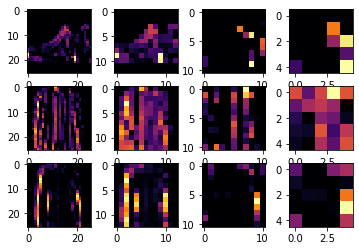

In [91]:
fig, ax = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):

  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  # Show image, convolution_number is just the channel to plot
  ax[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[2,x].grid(False)

and if we have to define our own convolution?

In [0]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

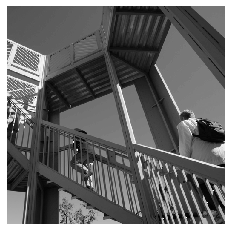

In [128]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [0]:
i_filtered = np.copy(i) # Must make copy
size_x = i_filtered.shape[0]
size_y = i_filtered.shape[1]

In [0]:
# Remember filter values should sum to 0 or 1

filter = [[1, 0, 0], 
          [0, -1, 0], 
          [0, 0, 1]]

weight = 1  # In case our filter does not add to 0 or 1

In [0]:
for x in range(1,size_x-1):
   for y in range(1,size_y-1):
     # Convolve!
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_filtered[x,y] = convolution

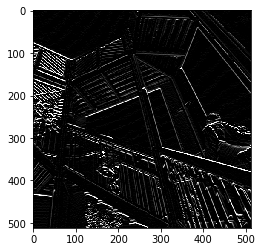

In [132]:
plt.gray()
plt.grid(False)
plt.imshow(i_filtered)
plt.show()   

What about our own max pooling?

In [0]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    # Take 4 pixels
    pixels.append(i_filtered[x, y])
    pixels.append(i_filtered[x+1, y])
    pixels.append(i_filtered[x, y+1])
    pixels.append(i_filtered[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels) # Max pool them

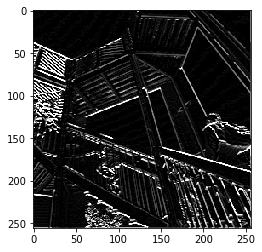

In [134]:
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      

and now for the `ImageDataGenerator` API to have images flow from a local directory. 

In [135]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-03-16 15:16:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   188MB/s    in 0.8s    

2020-03-16 15:16:43 (188 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [136]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-03-16 15:16:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.166.128, 2a00:1450:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.166.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  72.5MB/s    in 0.2s    

2020-03-16 15:16:50 (72.5 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
local_zip = '/tmp/horse-or-human.zip' # File
zip_ref = zipfile.ZipFile(local_zip, 'r') # Read
zip_ref.extractall('/tmp/horse-or-human') # Extract into directory
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Set directories

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

train_human_dir = os.path.join('/tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [0]:
model = tf.keras.models.Sequential([
    k.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    k.layers.MaxPooling2D(2, 2),
    k.layers.Conv2D(32, (3,3), activation='relu'),
    k.layers.MaxPooling2D(2,2),
    k.layers.Conv2D(64, (3,3), activation='relu'),
    k.layers.MaxPooling2D(2,2),
    k.layers.Conv2D(64, (3,3), activation='relu'),
    k.layers.MaxPooling2D(2,2),
    k.layers.Conv2D(64, (3,3), activation='relu'),
    k.layers.MaxPooling2D(2,2),
    k.layers.Flatten(),
    k.layers.Dense(512, activation='relu'),
    k.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1/255) # Normalize
val_datagen = ImageDataGenerator(rescale=1/255)

In [163]:
train_gen = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',  # Should be the directory containing our sub folders
    target_size=(300,300),   # Easy resizing on the fly
    batch_size=128,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [164]:
history = model.fit(  # fit_generator is deprecated, fit now supports generators
      train_gen,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = val_gen,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 0.7449 - acc: 0.6218 - val_loss: 0.6188 - val_acc: 0.6914
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.5097 - acc: 0.8009 - val_loss: 0.4167 - val_acc: 0.8516
Epoch 3/15
8/8 [==============================] - 8s 1s/step - loss: 0.1953 - acc: 0.9132 - val_loss: 1.2803 - val_acc: 0.8086
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.0965 - acc: 0.9622 - val_loss: 2.0571 - val_acc: 0.8008
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.0747 - acc: 0.9766 - val_loss: 1.4621 - val_acc: 0.8320
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.0431 - acc: 0.9800 - val_loss: 2.2310 - val_acc: 0.8203
Epoch 7/15
8/8 [==============================] - 8s 1s/step - loss: 0.0367 - acc: 0.9822 - val_loss: 1.9728 - val_acc: 0.8359
Epoch 8/15
8/8 [=====

Finally, a complete visualisation of the outputs of each layer.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


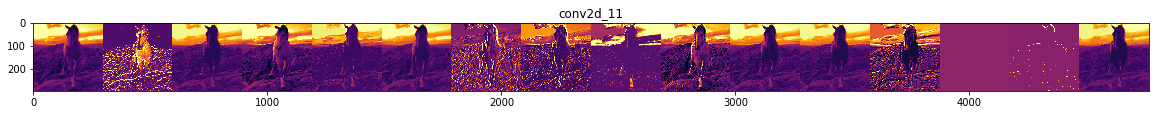

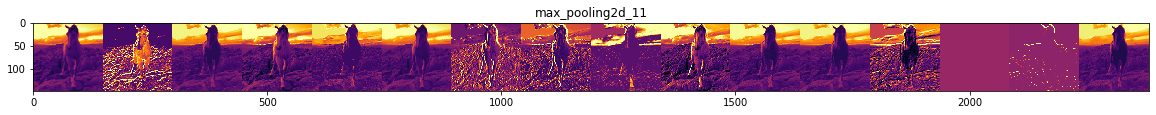

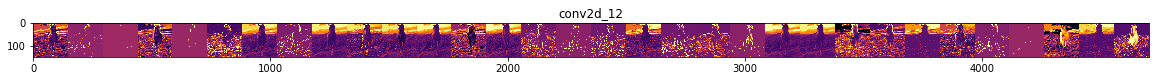

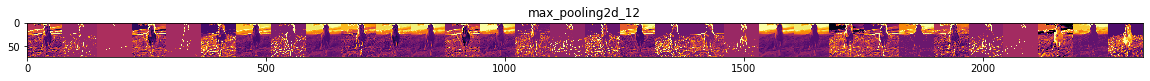

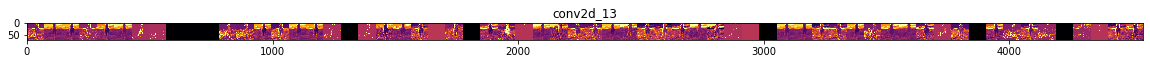

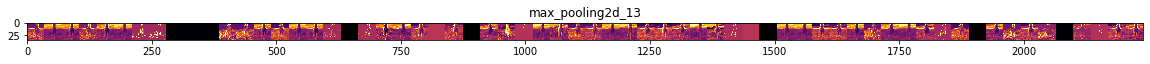

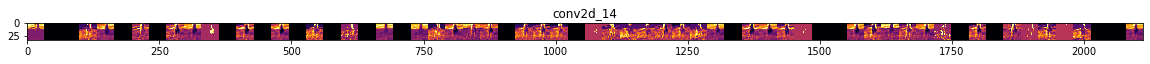

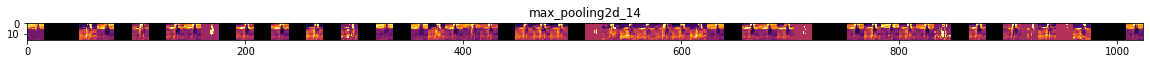

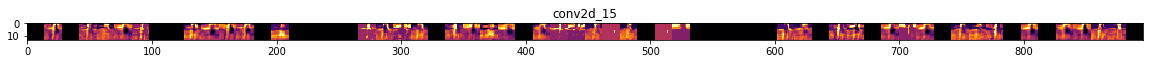

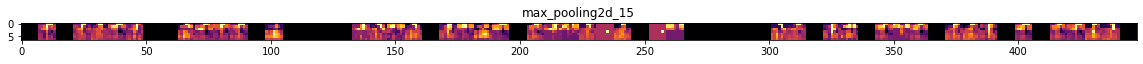

In [185]:
# Define a model to visualize the output of all layers
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Take random image from data
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

x /= 255  # Normalize

# Get feature maps
successive_feature_maps = visualization_model.predict(x)

# Get layer names
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Only display conv/pool maps
    n_features = feature_map.shape[-1]  # number of channels/features
    size = feature_map.shape[1] # Size of image
    # Tile image in matrix
    display_grid = np.zeros((size, size * n_features))  # grid for each feature 
    for i in range(n_features):
      # Postprocess -  without this images are tough to see 
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Tile current feature
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')